`Question: 1` A company wants to estimate the average time spent by customers on their website per session. They collect a random sample of 100 customers and find that the sample mean time spent is 4.5 minutes with a sample standard deviation of 1.2 minutes. Calculate a 99% confidence interval for the true population mean time spent on the website per session.




In [1]:
import pandas as pd
import scipy.stats as stats
import math

# Statistic
n = 100
x_bar = 4.5
s = 1.2
confidence_level = 99
alpha = 0.01

t_score = stats.t.ppf(1 - alpha / 2, n - 1)
lower_bound = x_bar - t_score * s / math.sqrt(n)
upper_bound = x_bar + t_score * s / math.sqrt(n)

print(t_score)

2.6264054572808275


In [2]:
print(
    f"The 99% confidence interval for the true population mean time spent on the website per session is ({lower_bound:.2f}, {upper_bound:.2f}) minutes.")

The 99% confidence interval for the true population mean time spent on the website per session is (4.18, 4.82) minutes.


`Question 2:` A car manufacturer is interested in estimating the mean gas mileage of their new SUV. A sample of 25 SUVs is taken, and their mean gas mileage is found to be 28.6 miles per gallon with a standard deviation of 2.8 miles per gallon. Calculate a 95% confidence interval for the true mean gas mileage of the SUV.

In [5]:
x_bar = 28.6
s = 2.8
alpha = 1 - (95 / 100)
n = 25

print(alpha)
t_score = stats.t.ppf(1 - alpha / 2, n - 1)
lower_bound = x_bar - t_score * s / math.sqrt(n)
upper_bound = x_bar + t_score * s / math.sqrt(n)

print(t_score)

0.050000000000000044
2.0638985616280205


In [7]:
import numpy as np

np.array([-1, 1])

array([-1,  1])

In [4]:
print(
    f"The 95% confidence Interval for the true mean gas mileage of the SUV is ({lower_bound:.2f}, {upper_bound:.2f})")

The 95% confidence Interval for hte true population mean time spent on the website per session is (27.44, 29.76) minutes


`Question -3:` Dataset - India temperature dataset.

Data link: https://drive.google.com/file/d/1whb8Rjdk9TBKOwVi8NwZD1Tc8Tdv7iEc/view?usp=share_link

Kaggle Link : (Just take IND data for this question, have to apply filtering). https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data

A climate research organization wants to estimate the average temperature of a certain country. They collect temperature data for 2613 days but due to certain limitations, they only have information about the average temperature for 2508 days. The organization assumes that the population follows a normal distribution and wants to estimate the population mean temperature with a 95% confidence interval.

* Standard deviation is assumed as given data standard deviation. z Procedure
* Standard deviation is not given. Apply t Procedure

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, norm

ind_data = pd.read_csv('ind_temp.csv')
print(ind_data.shape)
ind_data.head()

(2613, 4)


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1796-01-01,17.044,2.044,India
1,1796-02-01,19.193,1.359,India
2,1796-03-01,22.319,2.125,India
3,1796-04-01,27.233,1.510,India
4,1796-05-01,30.035,1.338,India


<Axes: ylabel='Density'>

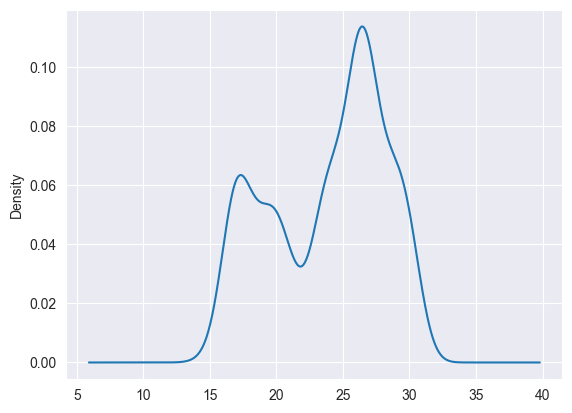

In [16]:
ind_data['AverageTemperature'].plot(kind='kde')

In [19]:
# Sample size 50 -> 200 times
samples = []
stds = []

for i in range(200):
    d = ind_data['AverageTemperature'].dropna().sample(50).values
    stds.append(d.std())
    samples.append(d.tolist())

samples = np.array(samples)
sampling_means = samples.mean(axis=1)
sample_std = np.mean(stds)

print(sampling_means[:10])
print(sampling_means.shape)
print(sample_std)

[24.5582  23.83826 23.7251  24.9578  23.69328 24.71066 24.24414 24.58712
 23.69562 23.10652]
(200,)
4.264783240209968


<Axes: ylabel='Density'>

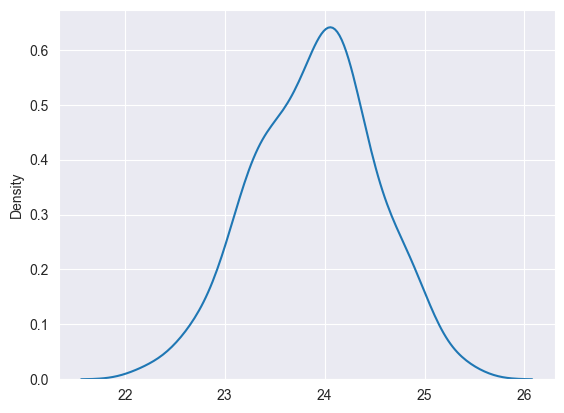

In [20]:
sns.kdeplot(sampling_means)

In [21]:
# T - procedure
# 0.975 because we wanted 95% confidence and 50 because sample size is 50 
alpha = 1 - (95 / 100)
n = 50

T = t.ppf(1 - alpha / 2, n - 1)
interval = sampling_means.mean() + np.array([-1, 1]) * T * sample_std / np.sqrt(n)

print("Interval of 95% confidence (t-procedure): ", interval)
print("Actual Data mean temperature: ", ind_data.AverageTemperature.mean())

Interval of 95% confidence (t-procedure):  [22.68747677 25.11032703]
Actual Data mean temperature:  23.873789473684212


` Z - Procedure `
You don’t actually have to look up z alpha/2 in a z-table every time. For most hypothesis tests, you’ll probably be using one of four confidence levels (90%, 95%, 98% and 99%). The z alpha/2 for each confidence level is always the same:

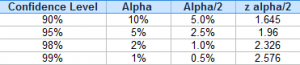

In [22]:
# Z - procedure 
std = ind_data.AverageTemperature.std()
std

4.325811210417989

In [23]:
# 95% -> 1 - alpha = 0.95 -> alpha = 0.5 -> alpha/2 = 0.25 -> 0.95 + 0.25 -> 0.975 
z = norm.ppf(0.975)
z

1.959963984540054

In [24]:
interval = sampling_means.mean() + np.array([-1, 1]) * z * std / np.sqrt(50)
print("Interval for 95% confidence (z-procedure): ", interval)
print('Actual data mean temperature: ', ind_data.AverageTemperature.mean())

Interval for 95% confidence (z-procedure):  [22.69987024 25.09793356]
Actual data mean temperature:  23.873789473684212


`Question 5:` BMW Dataset : https://drive.google.com/file/d/18amVv1WKKHEmwyvVy0RuXp4A6xrGOelc/view?usp=share_link



* Task 1:
The sales manager of a used car company wants to know what is the average selling price of all the used bmw cars.
The analyst can collect only a sample of sales of 500 cars in the area. Since this estimate is going to be used by the company to strategize sales of his company, the sample mean should be a good approximation of all the account.
What level of confidence is the sales manager going to be satisfied with? What +/- interval number is going to be acceptable?

* Task 2:
In addition to the price of the car, the manager also wants to now know the average mileage that the car has been driven. But the manager does not have the population standard deviation for the mileage. But the mileage data is available only from the 25 cars that they have sold so far.
How do the analyst approach this problem to calculate 95% confidence interval, with only 25 samples?

* Task 3:
The manager is not happy with both the intervals (intervals from task 1 and 2) as the interval for the confidence is very high. The manager now asks the analyst to estimate the average price of the car (similar to task 1) but within a bound of 750 from the mean with 95% condidence level. How many sample does the analyst have to collect to arrive at this confidence interval level?

* Task 4:
Conversely, after the analyst started collecting the data, after a week he was only able to collect for 420 samples, though he needs 540 samples for Bound of 1,000, if he has to do the analysis now, what is the best interval he can acheive for 95% confidence levels?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
bmw_df = pd.read_csv('bmw.csv')
print(bmw_df.shape)
bmw_df.head()

(10781, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


## Task 1 - If we apply t test

In [6]:
df_500 = bmw_df['price'].sample(500).values
df_500

array([25900,  9999, 28499, 16500, 20800, 11399, 13990, 22773, 52990,
       25000, 26995, 42430,  9250, 21730, 18990, 17912, 23150, 15000,
       11495, 40980, 28750, 25780, 18991, 10490, 26980, 14495, 17997,
       23440, 13521, 16202, 12500, 29485, 15800, 27152, 17000, 15250,
       17900, 48912, 15881, 23450, 22898, 14499, 31990, 11899, 27980,
       16300, 14500, 20945, 17640, 11399, 24775,  7998, 13500, 18299,
       22150, 17495, 28980, 16000, 19495, 28000, 24000, 38995, 52995,
       74140,  5290, 15990, 14000, 29991, 17895, 27980, 33980, 39390,
        6295, 28110, 39988, 12692, 19880, 26995, 21950, 26480, 11520,
       14990, 13798, 24988, 12000, 29500, 16998,  8400, 18640, 20998,
       12999, 11500, 26950, 18998, 29680, 28999, 11980, 26990, 21220,
       26990,  8890, 32890, 14491, 29995, 12291, 16500, 12250, 12399,
       12940,  3990, 14450, 22995, 23990, 22910, 22990, 26750, 16600,
       27780, 20980, 28991, 27000, 17750, 34994, 17240, 14950, 31444,
       19780, 29995,

In [9]:
sample_mean = df_500.mean()
print(sample_mean)

sample_std = df_500.std()
print(sample_std)

22839.684
11291.693441647449


In [11]:
# lets assume that confidence level is 95%
from scipy.stats import t

t_score = t.ppf(0.975, 200 - 1)
t_score

1.971956544249395

In [13]:
ci = sample_mean + np.array([-1, 1]) * t_score * (sample_std / np.sqrt(200))
ci

array([21265.18850863, 24414.17949137])

## If we apply z test

In [15]:
from scipy.stats import norm

df = bmw_df

sample_size = 500
sample = df.sample(n=sample_size, random_state=42)

sample_mean = sample['price'].mean()
population_std = df['price'].std(ddof=1)  # use ddof=1 for sample std dev

# set the desired level of confidence
confidence_level = 0.95

# Calculate the critical value for the confidence level
z_critical = norm.ppf(1 - (1 - confidence_level) / 2)

In [16]:
# 1 - (1 - confidence level)/2 -> 1 - (0.05)/2 -> 1 - 0.025 -> 0.975
1 - (1 - confidence_level) / 2

0.975

In [17]:
# Calculate the margin of error
margin_of_error = z_critical * population_std / np.sqrt(sample_size)
margin_of_error

1000.5967770277098

In [18]:
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

In [20]:
print(
    f"95% confidence interval for the average selling price of all used BMW cars based on the sample of 500 cars: ({lower_bound:.2f}, {upper_bound:.2f})")

95% confidence interval for the average selling price of all used BMW cars based on the sample of 500 cars: (22010.57, 24011.76)


## Task 2

In [36]:
sample_size = 25
sample = bmw_df['mileage'].sample(n=sample_size, random_state=1)

x_bar = sample.mean()
s = sample.std()
t_score = t.ppf(0.975, df=sample_size - 1)

margin_of_error = t_score * s / np.sqrt(sample_size)
margin_of_error

7191.446582146658

In [37]:
lower_bound = x_bar - margin_of_error
upper_bound = x_bar + margin_of_error

In [38]:
[lower_bound, upper_bound]

[17957.233417853342, 32340.12658214666]

## Task 3 

In [40]:
df = bmw_df
sample_mean = []
stds = []

for i in range(500):
    sample = df['price'].sample(n=50)
    sample_mean.append(sample.mean())
    stds.append(sample.std())

sample_std = np.mean(stds)
sample_std

11282.256966933332

In [42]:
import scipy.stats as stats

z = stats.norm.ppf(0.975)
print(z)
B = 750

n = ((z * sample_std) / B) ** 2
n

1.959963984540054


869.29189298891

## Task 4

In [55]:
sample_std = df['price'].sample(n=420).std()

z = 1.96
B = z * sample_std / np.sqrt(420)
B

1149.20522510381